In [24]:
import pandas as pd
from pandas import read_csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/diabetes.csv')
data.sample(10)

# mengimport datasets ke pandas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
33,6,92,92,0,0,19.9,0.188,28,0
95,6,144,72,27,228,33.9,0.255,40,0
706,10,115,0,0,0,0.0,0.261,30,1
511,0,139,62,17,210,22.1,0.207,21,0
245,9,184,85,15,0,30.0,1.213,49,1
594,6,123,72,45,230,33.6,0.733,34,0
215,12,151,70,40,271,41.8,0.742,38,1
464,10,115,98,0,0,24.0,1.022,34,0
494,3,80,0,0,0,0.0,0.174,22,0
343,5,122,86,0,0,34.7,0.290,33,0


In [26]:
data.info()

#total ada sebanyal 768 data dengan total kolom 9 dan tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
data.describe()
# Describe menampilkan count, mean, standar deviation, min, max, 25%, 50%, dan 75% dari atribut yang berupa angka dari kolom2 numerik dataset ini.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
data.isnull().sum()

#datanya bersih tidak ada missing value

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


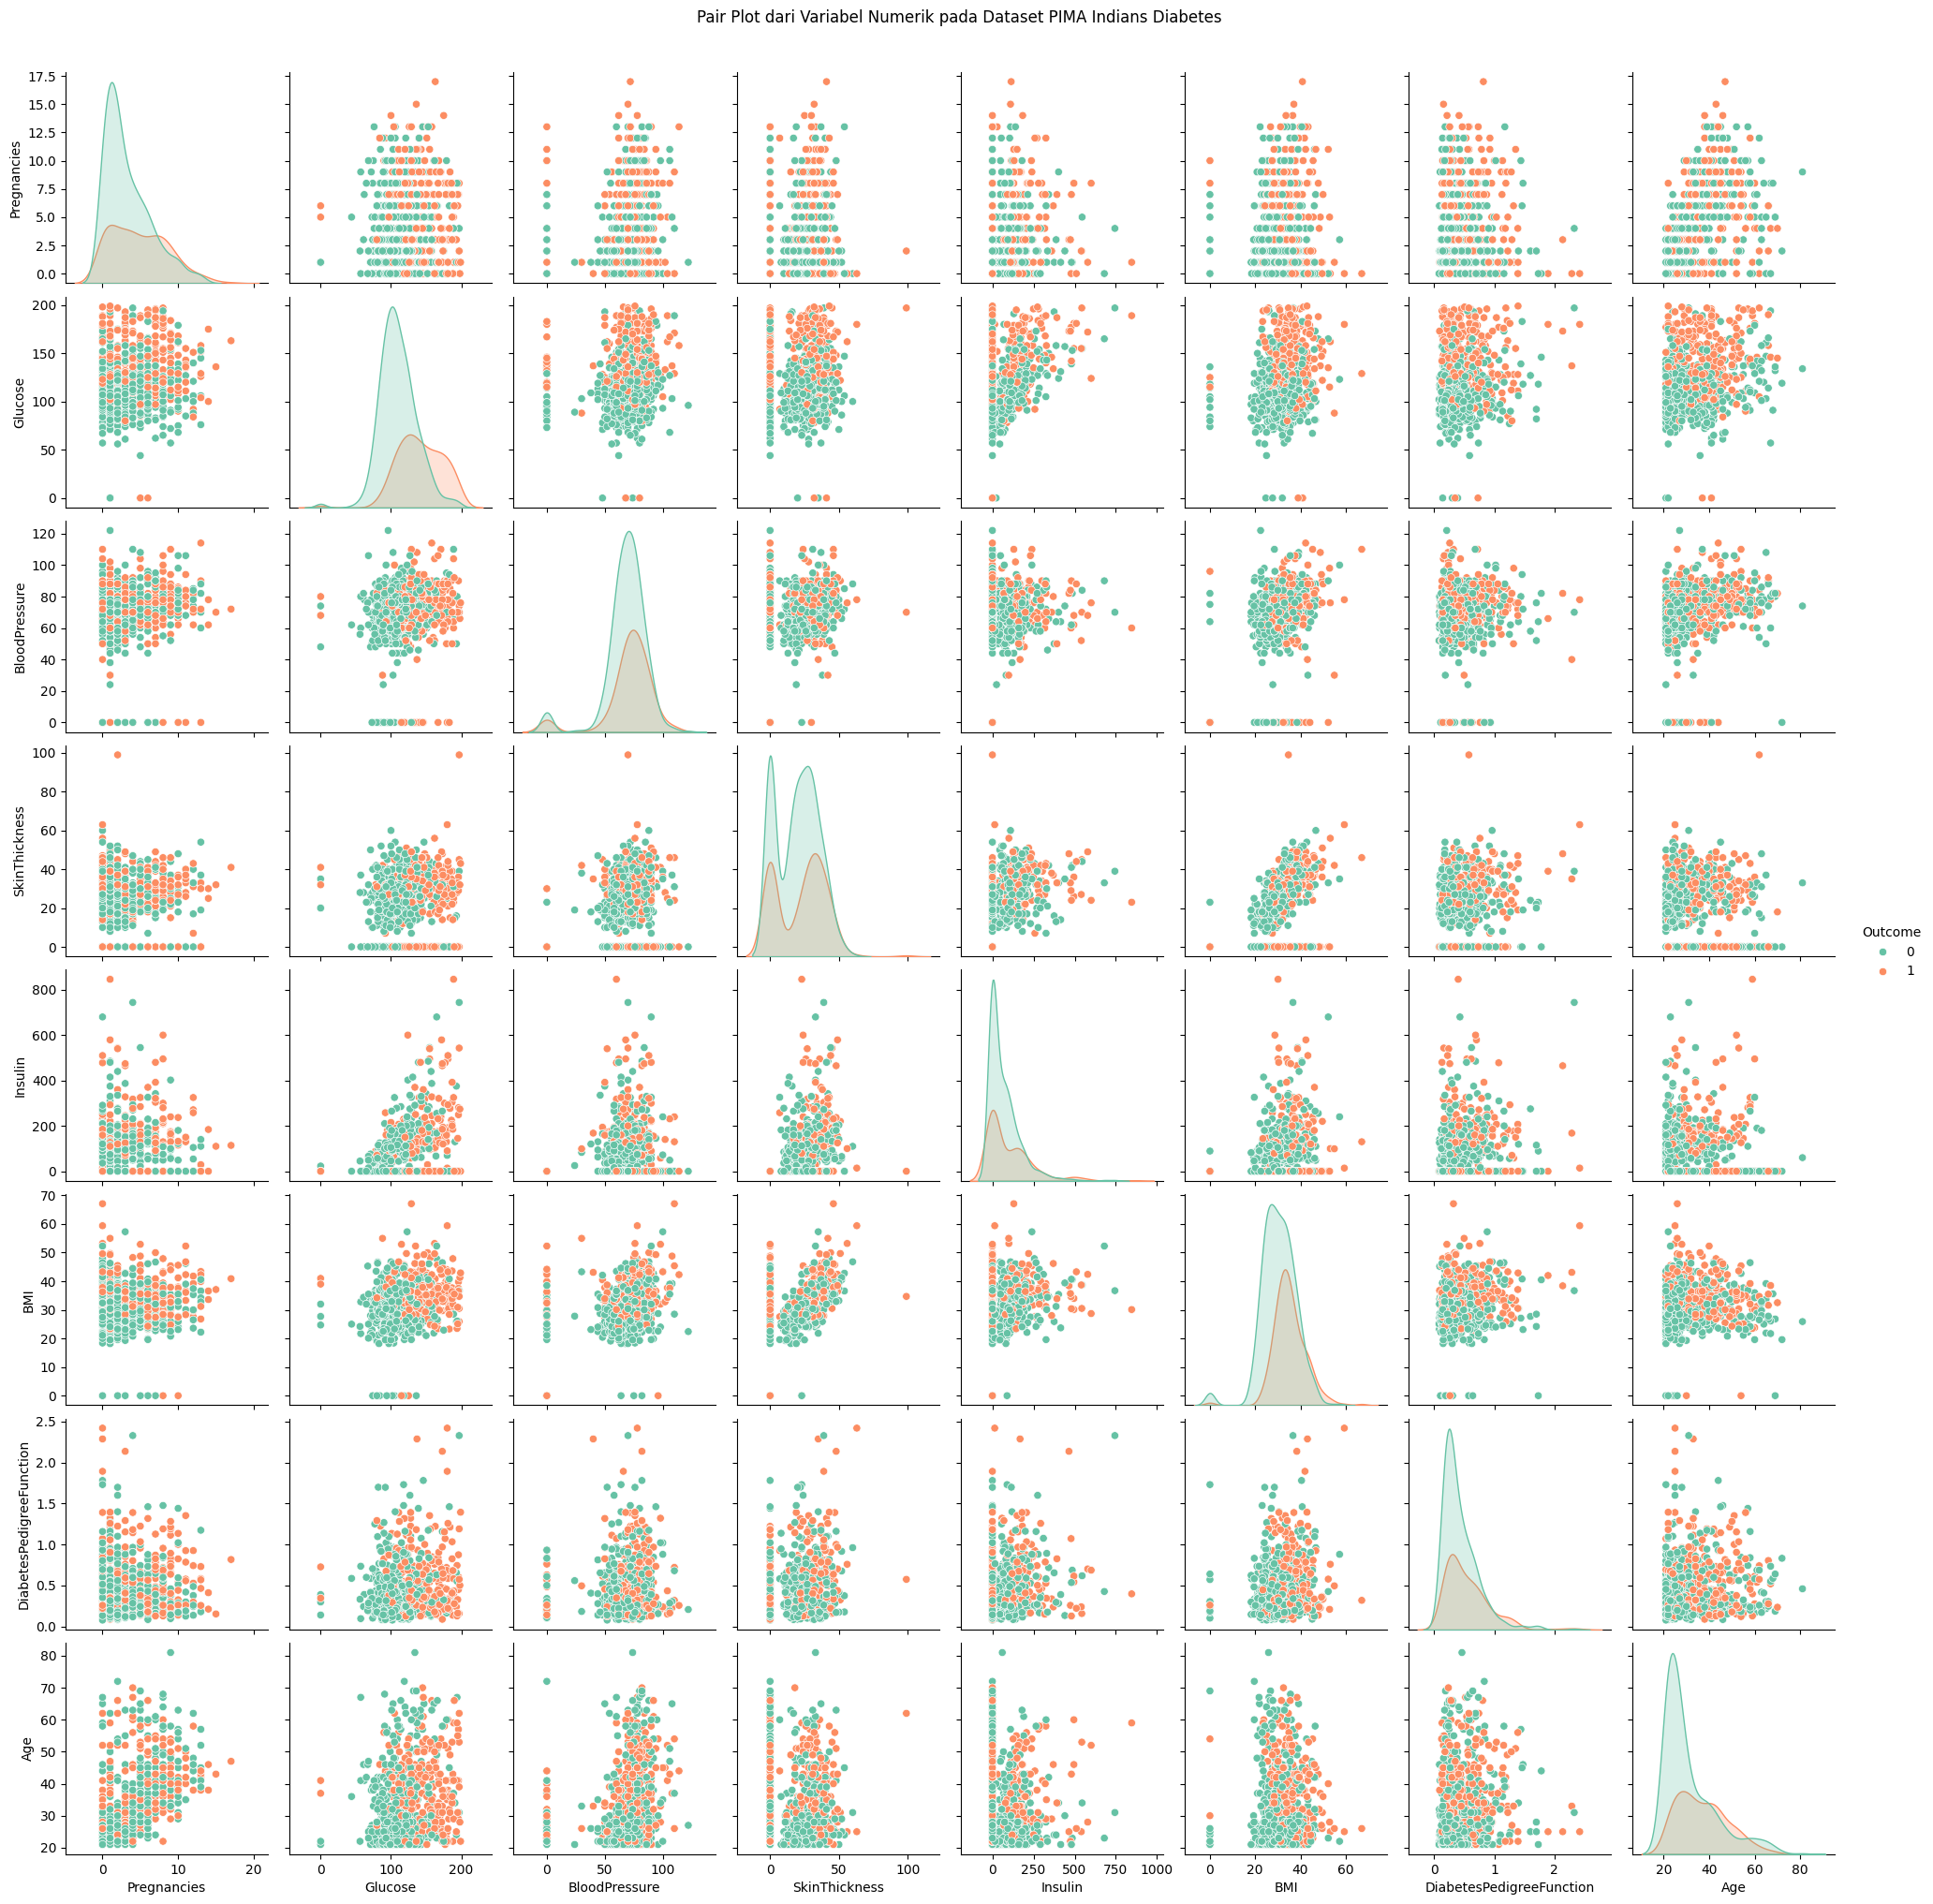

In [29]:
sns.pairplot(data, hue='Outcome', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot dari Variabel Numerik pada Dataset PIMA Indians Diabetes', y=1.02)
plt.show()

# Berdasarkan visualisasi pairplot ini dapat diketahui bahwa glucose yang tinggi juga memiliki resiko yang tinggi terhadap diabetes.

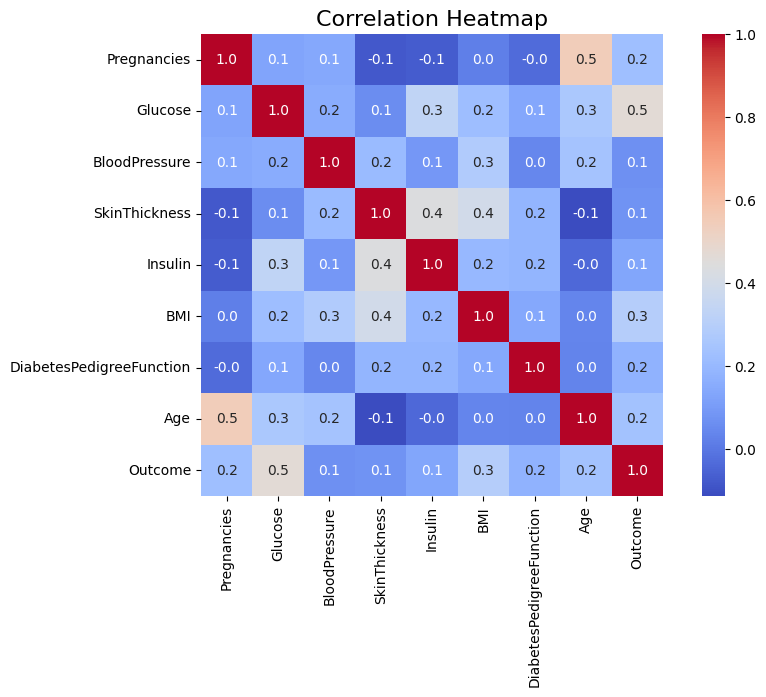

In [30]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Dari heatmap dibawah dapat dilihat bahwa kolerasi antara Age dan Pregnancies adalah 0.5. Ini berarti ketika usia meningkat, jumlah kehamilan juga cenderung meningkat.
# Selain itu Glucose juga memiliki kolerasi sebesar 0.5 terhadap Outcome. Yang menandakan bahwa  semakin tinggi kadar glukosa seseorang, semakin besar kemungkinan orang tersebut terkena diabetes.


<ipython-input-31-fe953ccd8d7e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_glucose.index, y=avg_glucose.values, palette='deep')


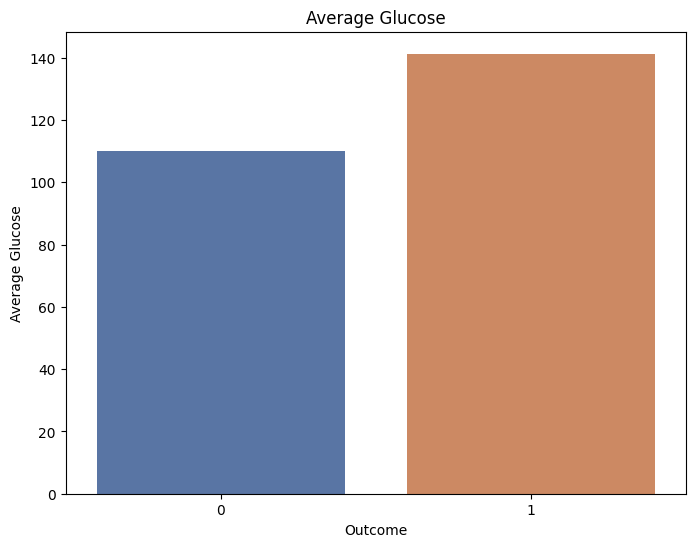

In [31]:
avg_glucose = data.groupby('Outcome')['Glucose'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_glucose.index, y=avg_glucose.values, palette='deep')

plt.title('Average Glucose')
plt.xlabel('Outcome')
plt.ylabel('Average Glucose')

plt.show()

# Rata-rata gula orang yang terkena diabetes yaitu 140

In [32]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

# X digunakan untuk membuat prediksi, y adalah target atau output yang ingin diprediksi.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Membagi dataset X dan y menjadi training dan testing data dengan pembagian 80% untuk training dan 20% untuk testing

X_train.shape, X_test.shape
# Menampilkan ukuran atau dimensi dari data latih (X_train) dan data uji (X_test) dalam bentuk tuple.

((614, 8), (154, 8))

Decision Tree

1. Entropy

In [34]:
ent = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
ent.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [35]:
y_pred_ent = ent.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria entropy.

print(f'Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_ent):.4f}')
# Menampilkan akurasi dari kriteria entropy berdasarkan y_test dan y_pred_clf.

Model accuracy score with criterion entropy: 0.7662


In [36]:
y_train_ent = ent.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_ent)
training_acc = accuracy_score(y_train, y_train_ent)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_gini, y_train, dan y_train_gini.
# Perbedaan antara training set score dan test set score sangat kecil (hanya 0.90%), yang menunjukkan bahwa model memiliki kemampuan generalisasi yang baik dan tidak terlalu overfitting.

Training set score: 0.7752
Test set score: 0.7662


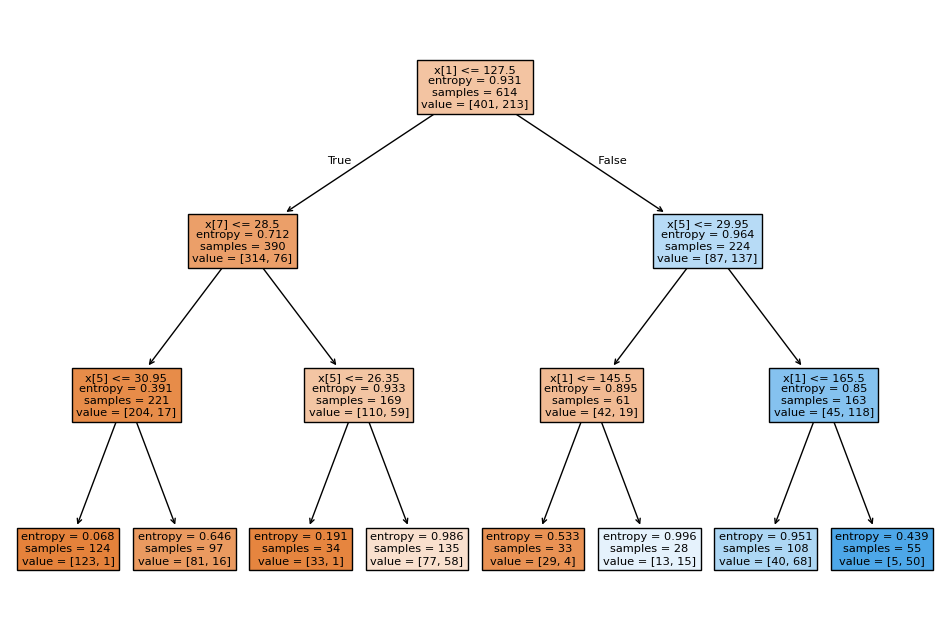

In [37]:
plt.figure(figsize=(12, 8))
tree.plot_tree(ent, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

2. Gini

In [38]:
gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
gini.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:
y_pred_gini = gini.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria gini.

print(f'Model accuracy score with criterion gini: {accuracy_score(y_test, y_pred_gini):.4f}')
# Menampilkan akurasi dari kriteria gini berdasarkan y_test dan y_pred_clf.

Model accuracy score with criterion gini: 0.7597


In [40]:
y_train_gini = gini.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_gini)
training_acc = accuracy_score(y_train, y_train_gini)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_gini, y_train, dan y_train_gini.
# Perbedaan antara kedua skor ini relatif kecil (sekitar 1.72%), yang berarti model tidak terlalu overfitting (di mana model sangat cocok untuk training set tetapi buruk pada test set).

Training set score: 0.7769
Test set score: 0.7597


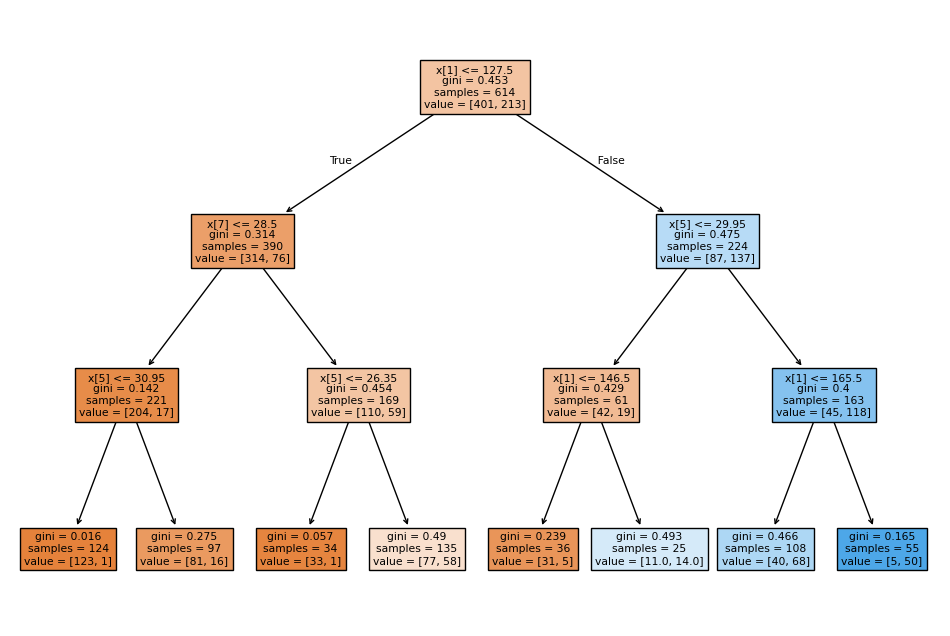

In [41]:
plt.figure(figsize=(12, 8))
tree.plot_tree(gini, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

Naive Bayes

In [42]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model dengan menggunakan Naive Bayes.

GaussianNB()

In [43]:
y_pred_nb = nb.predict(X_test)
# Untuk menghasilkan prediksi menggunakan Naive Bayes.

In [44]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_nb.


Accuracy Score: 0.7662


In [45]:
y_train_nb = nb.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_nb)
training_acc = accuracy_score(y_train, y_train_nb)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_nb, y_train, dan y_train_nb.
# Selisih sekitar 1.38% menunjukkan bahwa model tidak mengalami overfitting

Training set score: 0.7524
Test set score: 0.7662


KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

k = 15 # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# Untuk menghasilkan prediksi menggunakan KNN.

In [47]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari KNN berdasarkan y_test dan y_pred_knn.

Accuracy Score: 0.7597


In [48]:
cm_entropy = confusion_matrix(y_test, y_pred_ent)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix KNN:")
print(cm_knn)


# Menampilkan confusion matrix dari kriteria entropy, kriteria gini index, Naive Bayes, dan KNN.

Confusion Matrix Entropy:
[[83 16]
 [20 35]]

Confusion Matrix Gini:
[[83 16]
 [21 34]]

Confusion Matrix Naive Bayes:
[[79 20]
 [16 39]]

Confusion Matrix KNN:
[[84 15]
 [22 33]]


In [49]:
#g
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_ent))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))

# Menampilkan classification report dari kriteria entropy, kriteria gini index, Naive Bayes, dan KNN.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154


Classification Report Gini
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75  

In [52]:
# Uji coba dengan kriteria Entropy menghasilkan akurasi 0.7662.
# Uji coba dengan kriteria Gini Index menghasilkan akurasi 0.7597.
# Uji coba dengan Naive Bayes menghasilkan akurasi 0.7662.
# Uji coba dengan KNN menghasilkan akurasi 0.7597.
print('Dari empat algoritma yang diuji, Naive Bayes dan Decision Tree dengan Entropy mencapai akurasi tertinggi sebesar 0.7662.')
print('Keduanya seimbang dalam mengklasifikasikan data, namun Naive Bayes lebih baik dalam mengenali kelas 1, sedangkan Entropy lebih stabil di kedua kelas.')
print('Gini Index dan KNN memiliki akurasi sedikit lebih rendah (0.7597) dan lebih kuat pada kelas 0.')
print('Secara keseluruhan, Naive Bayes dan kriteria Entropy adalah pilihan yang baik, terutama untuk kasus yang memerlukan keseimbangan antara identifikasi kelas mayoritas dan minoritas.')


Dari empat algoritma yang diuji, Naive Bayes dan Decision Tree dengan Entropy mencapai akurasi tertinggi sebesar 0.7662.
Keduanya seimbang dalam mengklasifikasikan data, namun Naive Bayes lebih baik dalam mengenali kelas 1, sedangkan Entropy lebih stabil di kedua kelas.
Gini Index dan KNN memiliki akurasi sedikit lebih rendah (0.7597) dan lebih kuat pada kelas 0.
Secara keseluruhan, Naive Bayes dan kriteria Entropy adalah pilihan yang baik, terutama untuk kasus yang memerlukan keseimbangan antara identifikasi kelas mayoritas dan minoritas.
